In [1]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
import os.path
userhome = os.path.expanduser('~')
csvfile = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_Count', 'part-r-00000')
df = pd.read_csv(csvfile,header=None)

/Users/pipiterry/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from pyspark import SparkContext, SparkConf
sc = SparkContext("local", "Page Rank")    
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
df.columns = ['Hour','total_people']
df.head()

,Hour,total_people
0,1,24164
1,10,126257
2,11,151320
3,12,184414
4,13,184919


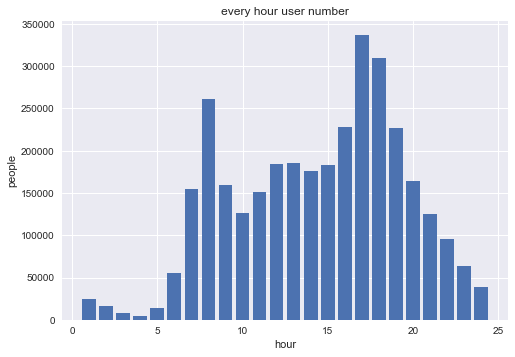

In [4]:
plt.title('every hour user number')
plt.xlabel('hour')
plt.ylabel('people')
plt.bar(df.Hour,df.total_people)
plt.show()

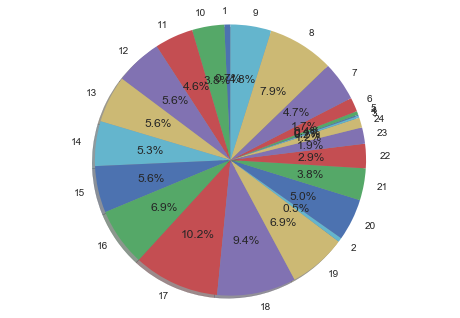

In [5]:
import matplotlib.pyplot as plt


# The slices will be ordered and plotted counter-clockwise.
labels = df.Hour
sizes = df.total_people

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()



In [6]:
csvfile2 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_temp', 'part-r-00000')
df2 = pd.read_csv(csvfile2,header=None)
df2.columns = ['temp','total_people']
df2.head()

,temp,total_people
0,0.059130,981
1,0.096522,986
2,0.097391,1416
3,0.107500,2368
4,0.127500,1529


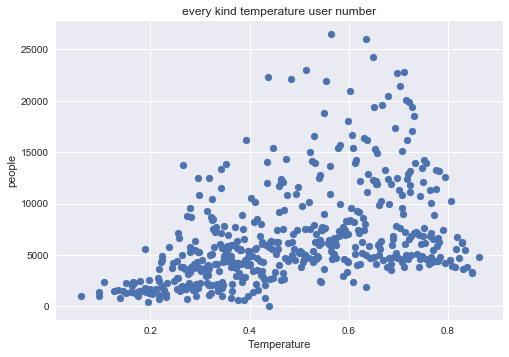

In [7]:
plt.title('every kind temperature user number')
plt.xlabel('Temperature')
plt.ylabel('people')
plt.scatter(df2.temp,df2.total_people)
plt.show()

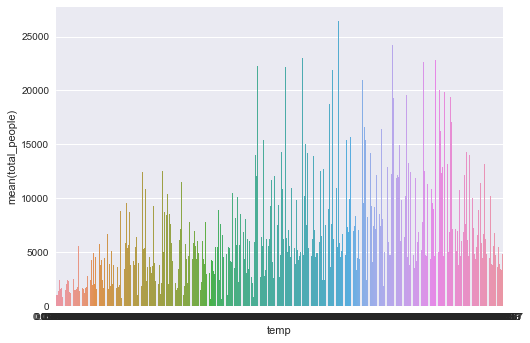

In [8]:
sns.barplot(x='temp', y='total_people', data = df2)

In [9]:
csvfile3 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_toptemp', 'part-r-00000')
df3 = pd.read_csv(csvfile3,header=None)
df3.columns = ['temp','total_people']
df3.head(5)

,temp,total_people
0,0.710833,22806
1,0.514167,22963
2,0.649167,24216
3,0.635000,26012
4,0.564167,26439


In [10]:
csvfile3 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_tophr', 'part-r-00000')
df3 = pd.read_csv(csvfile3,header=None)
df3.columns = ['Hour','total_people']
df3

,Hour,total_people
0,8,261001
1,18,309772
2,17,336860


In [11]:
csvfile4 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_season', '01-m-00000')
df4 = pd.read_csv(csvfile4,header=None)
df4.columns = ['instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']

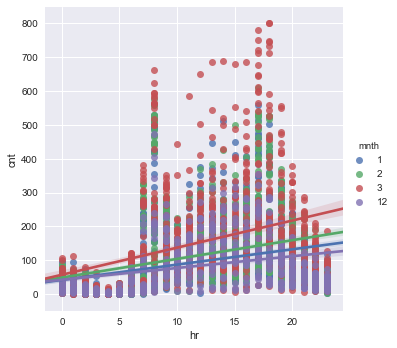

In [12]:
#spring
sns.lmplot(x = 'hr', y='cnt', hue='mnth', data = df4)
plt.show()

In [13]:
sdf = spark.createDataFrame(df4)
sdf.createOrReplaceTempView('brew')
sql_brew=spark.sql("SELECT * FROM brew")
picture1 = spark.sql("SELECT sum(casual) as cc,sum(registered) as rr FROM brew")
picture1.show()


+-----+------+
|   cc|    rr|
+-----+------+
|60622|410726|
+-----+------+



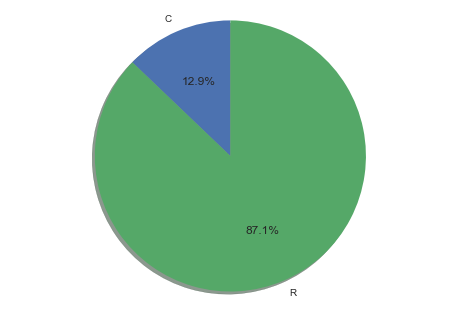

In [25]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'C', 'R'
sizes = '60622', '410726'

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

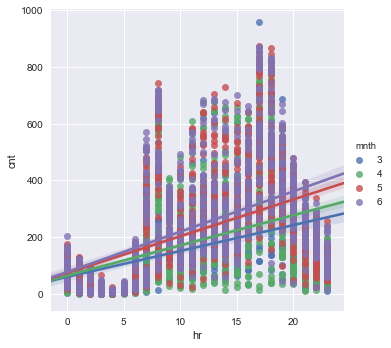

In [15]:
#summer
csvfile4 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_season', '02-m-00000')
df4 = pd.read_csv(csvfile4,header=None)
df4.columns = ['instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
sns.lmplot(x = 'hr', y='cnt', hue='mnth', data = df4)
plt.show()

In [16]:
sdf = spark.createDataFrame(df4)
sdf.createOrReplaceTempView('brew')
sql_brew=spark.sql("SELECT * FROM brew")
picture1 = spark.sql("SELECT sum(casual) as cc,sum(registered) as rr FROM brew")
picture1.show()



+------+------+
|    cc|    rr|
+------+------+
|203522|715067|
+------+------+



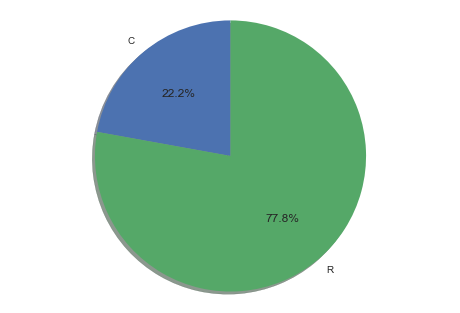

In [26]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'C', 'R'
sizes = '203522', '715067'

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

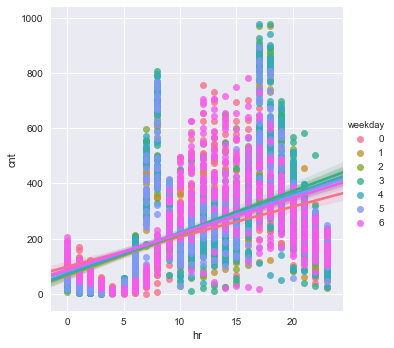

In [18]:
#full
csvfile4 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_season', '03-m-00000')
df4 = pd.read_csv(csvfile4,header=None)
df4.columns = ['instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
sns.lmplot(x = 'hr', y='cnt', hue='weekday', data = df4)
plt.show()

In [19]:
sdf = spark.createDataFrame(df4)
sdf.createOrReplaceTempView('brew')
sql_brew=spark.sql("SELECT * FROM brew")
picture1 = spark.sql("SELECT sum(casual) as cc,sum(registered) as rr FROM brew")
picture1.show()

+------+------+
|    cc|    rr|
+------+------+
|226091|835038|
+------+------+



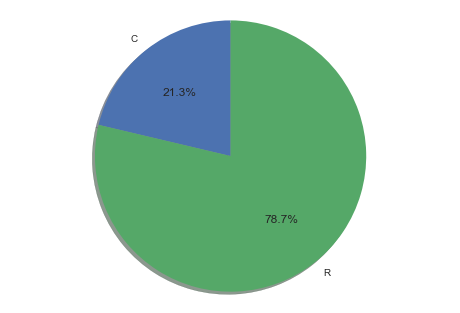

In [27]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'C', 'R'
sizes = '226091', '835038'

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

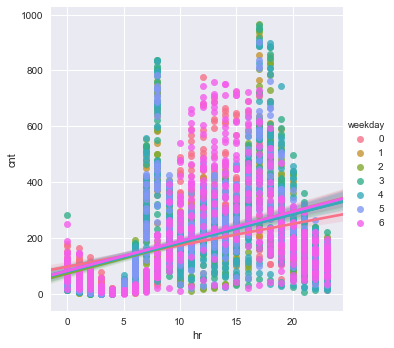

In [21]:
#winter
csvfile4 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'info7275_final', 'output_season', '04-m-00000')
df4 = pd.read_csv(csvfile4,header=None)
df4.columns = ['instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
sns.lmplot(x = 'hr', y='cnt', hue='weekday', data = df4)
plt.show()

In [22]:
sdf = spark.createDataFrame(df4)
sdf.createOrReplaceTempView('brew')
sql_brew=spark.sql("SELECT * FROM brew")

In [23]:
picture1 = spark.sql("SELECT sum(casual) as cc,sum(registered) as rr FROM brew")
picture1.show()

+------+------+
|    cc|    rr|
+------+------+
|129782|711831|
+------+------+



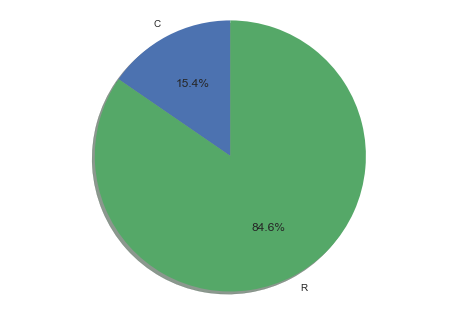

In [24]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'C', 'R'
sizes = '129782', '711831'

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()